# Basic Usage of [Gym](https://gym.openai.com/) from OpenAI

In [1]:
import gym
from gym import envs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print ("gym:[%s]"%(gym.__version__))
print ("numpy:[%s]"%(np.__version__))
print ("matplotlib:[%s]"%(matplotlib.__version__))

gym:[0.26.2]
numpy:[1.21.5]
matplotlib:[3.5.2]


### Discrete environment (FrozenLake 8x8)

##### Initialize 

In [2]:
env = gym.make('FrozenLake8x8-v1')
print ("[%s] initialized."%(env.unwrapped.spec.id))

[FrozenLake8x8-v1] initialized.


##### Render 
```
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
```

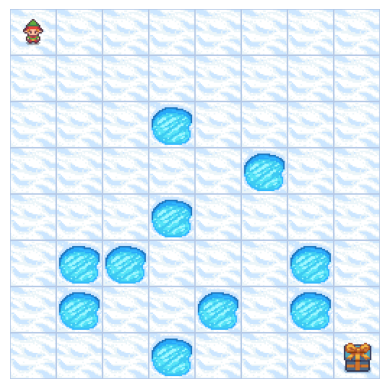

In [3]:
env = gym.make('FrozenLake8x8-v1',render_mode='rgb_array')
env.reset()
img = env.render()
plt.imshow(img); plt.axis('off'); plt.show()

##### State and action space

In [4]:
obs_space    = env.observation_space
n_state      = obs_space.n
action_space = env.action_space
n_action     = action_space.n
print("Observation space:[%d]"%(n_state))
print("Action space:[%d]"%(n_action))

Observation space:[64]
Action space:[4]


##### Loop 

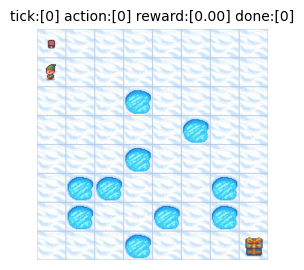

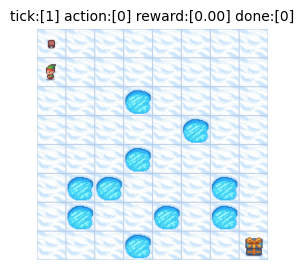

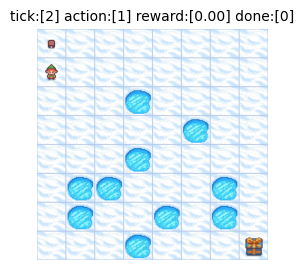

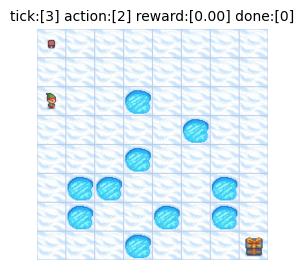

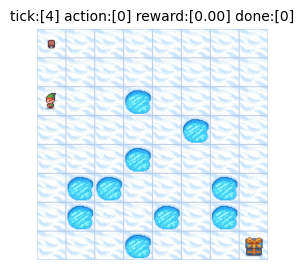

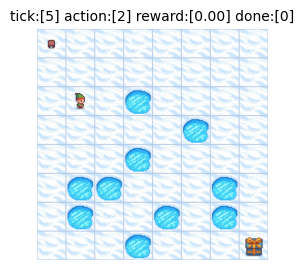

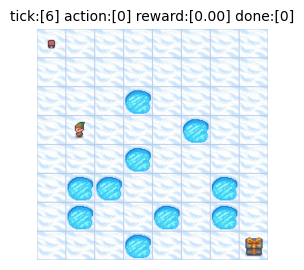

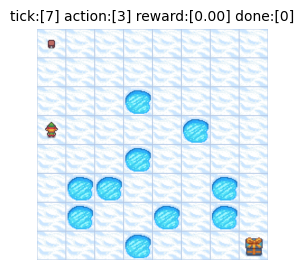

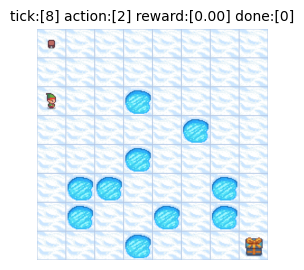

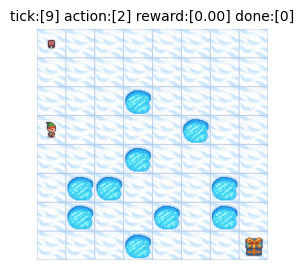

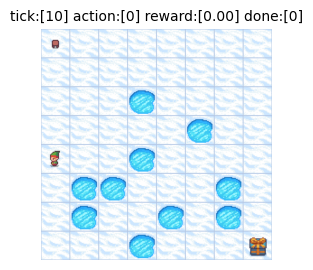

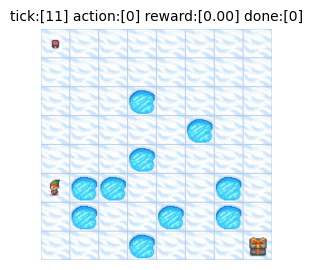

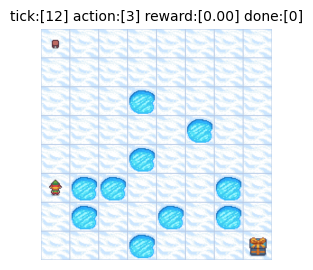

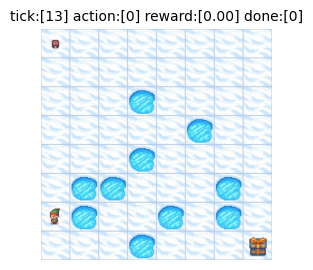

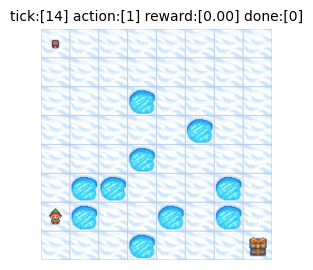

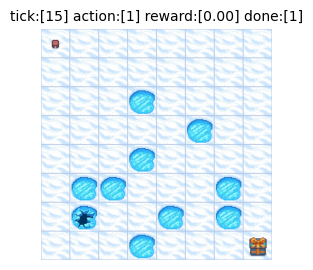

In [5]:
env.reset() # reset
for tick in range(100):
    action = env.action_space.sample() # sample a random action 
    observation, reward, done, truncated, info = env.step(action) # step 
    img = env.render()
    plt.figure(figsize=(3,3)); plt.imshow(img); plt.axis('off'); 
    plt.title("tick:[%d] action:[%s] reward:[%.2f] done:[%d]"%
              (tick,action,reward,done),fontsize=10); plt.show()
    if done: break
env.close()

#### Transition probability and reward

In [6]:
P = env.unwrapped.P 
for s in P.keys(): # for all states
    for a in P[s].keys(): # for all actions
        for (prob,s_prime,rwd,_) in P[s][a]:
            print ("P(s':%02d|s:%02d,a:%02d)=%.2f, Reward=%.2f"%
                   (s_prime,s,a,prob,rwd))

P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':08|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:01)=0.33, Reward=0.00
P(s':01|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:02)=0.33, Reward=0.00
P(s':00|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:00)=0.33, Reward=0.00
P(s':09|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:01)=0.33, Reward=0.00
P(s':02|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:02)=0.33, Reward=0.00
P(s':01|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:03)=0.33, Reward=0.00
P(s':00|s:01,a:03)=0.33, Reward=0.00
P(s':02|s:02,a:00)=0.33, Reward=0.00
P(s':01|s:02,a:00)=0.33, Reward=0.00
P(s':10|s:02,a:00)=0.33, Reward=0.00
P

### Continuous environment (CartPole)

##### Initialize 

In [7]:
env = gym.make('CartPole-v1',render_mode='rgb_array')
env.reset()
print ("[%s] initialized."%(env.unwrapped.spec.id))

[CartPole-v1] initialized.


##### Render

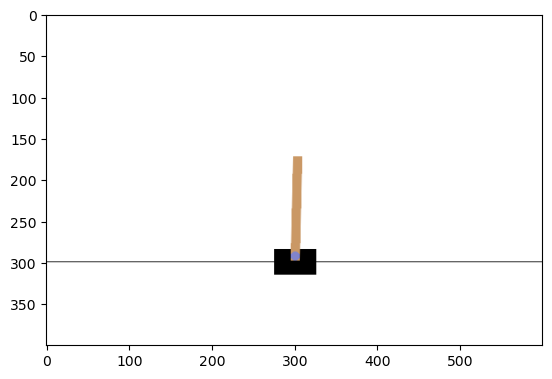

In [8]:
%matplotlib inline
env = gym.make('CartPole-v1',render_mode='rgb_array')
env.reset()
frame = env.render()
plt.imshow(frame) 
env.close()

##### State and action space

In [9]:
np.set_printoptions(precision=3) # set print options
obs_space = env.observation_space
action_space = env.action_space
n_action = action_space.n
print("Observation space:%s"%(obs_space.shape,))
print("   low:%s"%(obs_space.low,))
print("  high:%s"%(obs_space.high,))
print("Action space:[%d]"%(n_action))

Observation space:(4,)
   low:[-4.800e+00 -3.403e+38 -4.189e-01 -3.403e+38]
  high:[4.800e+00 3.403e+38 4.189e-01 3.403e+38]
Action space:[2]


##### Make a gif 

In [16]:
import cv2
from matplotlib import animation
from IPython.display import display, HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_jshtml())
def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(
        plt.gcf(),animate,frames=len(frames),interval=10)
    display(display_animation(anim))
    
# Loop
env = gym.make('CartPole-v1',render_mode='rgb_array')
env.reset()
frames = []
for t in range(10000):
    action = action_space.sample() # random action
    obs, reward, done, truncated, info = env.step(action) # step 
    frame = env.render()
    texted_frame = cv2.putText(
        img=np.copy(frame),text='tick:%d'%(t),org=(100,25),
        fontFace=3,fontScale=1,color=(0,0,255),thickness=1)
    frames.append(texted_frame)
    if done: break
env.close()
print ("[%d] frames."%(len(frames)))
display_frames_as_gif(frames)

[23] frames.


### PyBullet Gym

In [11]:
import numpy as np
import gym, cv2
gym.logger.set_level(40)
print ("Done.")

Done.


In [12]:
env = gym.make('Ant-v2',render_mode='rgb_array')
odim = env.observation_space.shape[0]
adim = env.action_space.shape[0]
print ("odim:[%d] adim:[%d]"%(odim,adim))

o,d = env.reset(),False # reset env
frames = []
while not d:
    tick = len(frames)
    a = env.action_space.sample()
    frame = env.render()
    o,r,d,_,_ = env.step(a)
    texted_frame = cv2.putText(
        img=np.copy(frame),
        text='tick:[%d]'%(tick),
        org=(80,30),fontFace=2,fontScale=0.8,color=(0,0,255),thickness=1)
    frames.append(texted_frame)
    if tick > 100: break
display_frames_as_gif(frames)

odim:[111] adim:[8]
Creating offscreen glfw
